In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [3]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [4]:
df.shape

(1000, 17)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [7]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [8]:
df['Branch'].unique()

array(['A', 'C', 'B'], dtype=object)

In [9]:
df['City'].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [10]:
df['Customer type'].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

In [11]:
df['Date'] = pd.to_datetime(df['Date'])

df['Time'] = pd.to_datetime(df['Time'])

df['Year'] = df['Date'].dt.year

df['Month'] = df['Date'].dt.month

df['Day'] = df['Date'].dt.day

df['Hour'] = df['Time'].dt.hour

In [12]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

### Sales Analysis

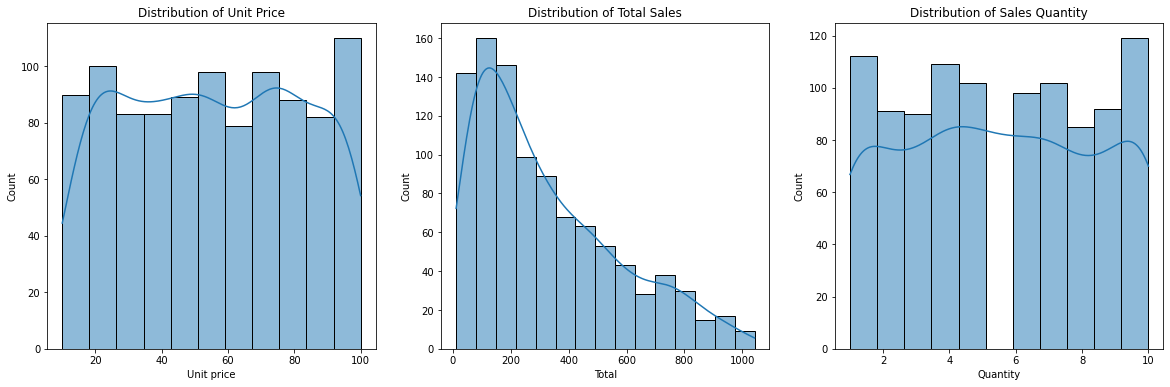

In [13]:
fig, axes = plt.subplots(1,3,figsize=(20,6))

sns.histplot(df['Unit price'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Unit Price')

sns.histplot(df['Total'], kde=True,ax=axes[1])
axes[1].set_title('Distribution of Total Sales')

sns.histplot(df['Quantity'], kde=True,ax=axes[2])
axes[2].set_title('Distribution of Sales Quantity')

plt.show()

##### Figures 1, 2 and 3. 
First and third figures display data with nearly uniform distribution across their respective variables. However, in Figure 2, a clear inverse relationship is evident: as the volume of sales increases, the number of transactions decreases.

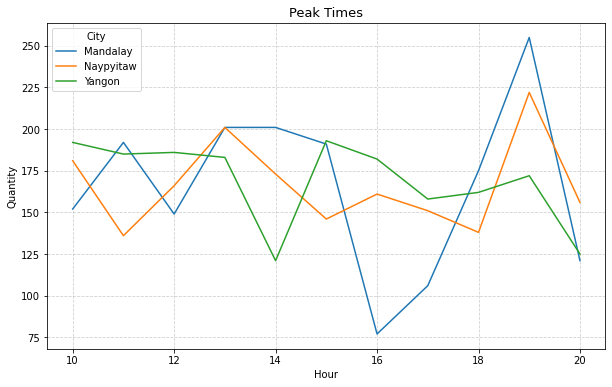

In [14]:
hour_trends = df.groupby(['City','Hour'])['Quantity'].sum().reset_index()

plt.figure(figsize=(10,6))
ax = sns.lineplot(x='Hour', y='Quantity',hue='City', data = hour_trends)

ax.grid(True, linestyle='--', alpha=0.6)
ax.legend(title='City', fontsize=10)

plt.title('Peak Times', fontsize=13)

plt.show()

##### Figure 4.
In Mandalay and Naypyitaw peak times for selling goods are 19.00, but in Yangon peak time is 15.00.

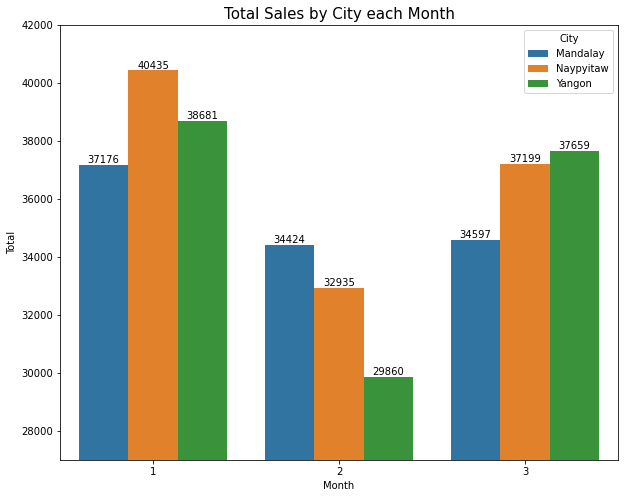

In [15]:
grouped = df.groupby(['City','Month'])['Total'].sum().reset_index()

plt.figure(figsize=(10,8))

one = sns.barplot(x='Month', y='Total', hue='City', data=grouped)

for a in one.patches:
    one.annotate(f'{a.get_height():.0f}', (a.get_x() + a.get_width() / 2., a.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')
    

one.set_ylim(27000,42000)
plt.title('Total Sales by City each Month', fontsize= 15)
plt.show()

##### Figure 5.
In February, total sales in all cities combined at its lowest, while in January total sales was highest. In January, most sales occured in Naypyitaw.

### Product Analysis

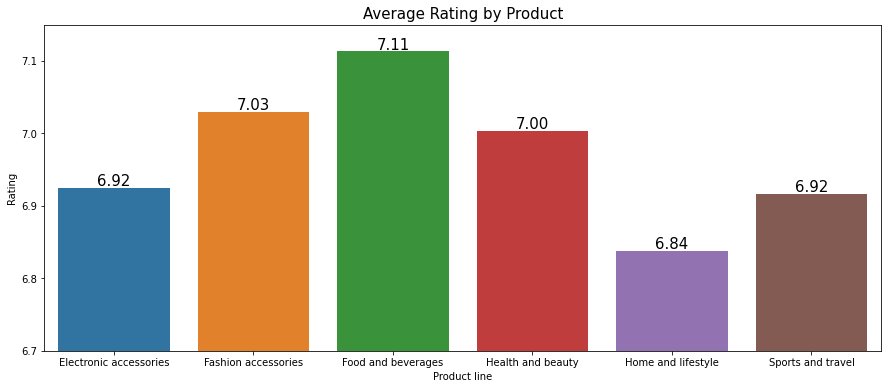

In [16]:
plt.figure(figsize=(15,6))
rating_group = df.groupby('Product line')['Rating'].mean().round(3).reset_index()

one = sns.barplot(x='Product line', y='Rating', data=rating_group)

for m in one.patches:    
     one.annotate(f'{m.get_height():.2f}', (m.get_x() + m.get_width() / 2., m.get_height()),
                ha='center', va='center', fontsize=15, color='black', xytext=(0, 7),
                textcoords='offset points')

one.set_ylim(6.7, 7.15)
one.set_title('Average Rating by Product', fontsize=15)
plt.show()

##### Figure 6.
While "Food and beverages" has the highest overall rating amongst the product lines, "Home and lifestyle" has the lowest rating with value of 6,84.

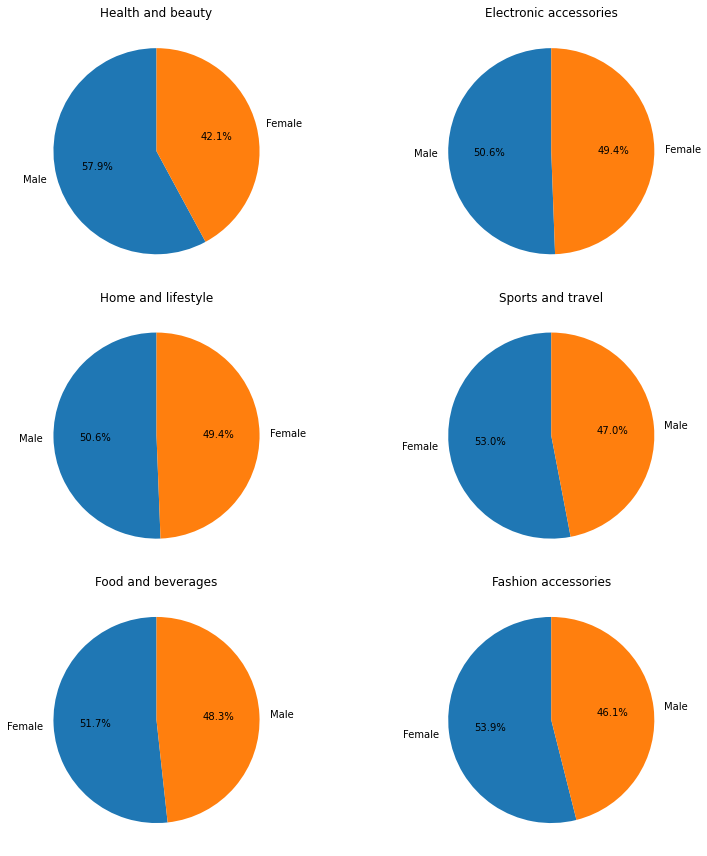

In [17]:
product_lines = df['Product line'].unique()

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes = axes.ravel()

for i, product_line in enumerate(product_lines):
    ax = axes[i]

    product_data = df[df['Product line'] == product_line]

    gender_counts = product_data['Gender'].value_counts()

    ax.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{product_line}')

plt.tight_layout()
plt.show()

##### Figure 7.
It is worth noting that males are majority buyers of "Health and beauty" product type with a share of 58%. Females are majority buyers of "Fashion accessories", "Sports and Travel","Food and beverages" with a shares ranging between 51-54%. The other two categories "Home and Lifestyle" and "Electronic Accessories" have roughy the same customer genders.

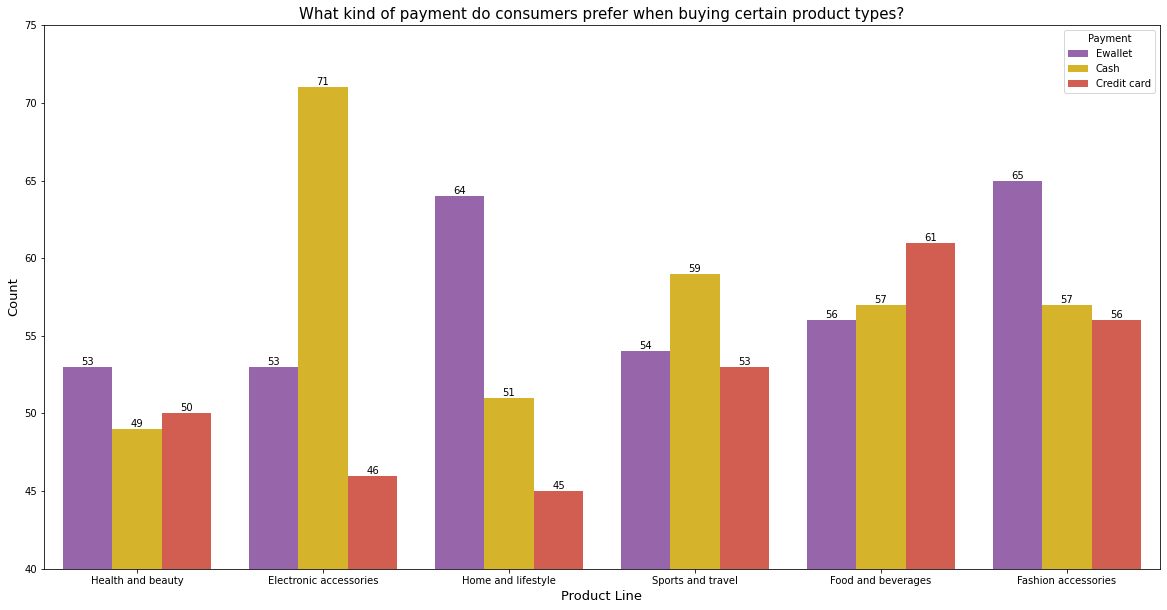

In [18]:
plt.figure(figsize=(20,10))

colors = ["#9B59B6", "#F1C40F", "#E74C3C"]
ax = sns.countplot(x='Product line', hue='Payment', data=df, palette=colors)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', (p.get_x()+p.get_width()/2, p.get_height()) ,xytext=(0,5),
                 ha='center', va='center', textcoords = 'offset points')
    
ax.set_ylim(40,75)
plt.xlabel('Product Line', fontsize= 13)
plt.ylabel('Count', fontsize= 13)
plt.title('What kind of payment do consumers prefer when buying certain product types?',fontsize=15)
plt.show()

##### Figure 8.1.
It is obvious that most consumers prefer buying their electronic accessories by cash. Also they prefer using cash when buying products that related to sports and travel. Apart from that, consumers tend to buy fashion accessories, health & beauty and home & lifestyle products by using Ewallet. They only prefer using credit cards while buying food and beverages.

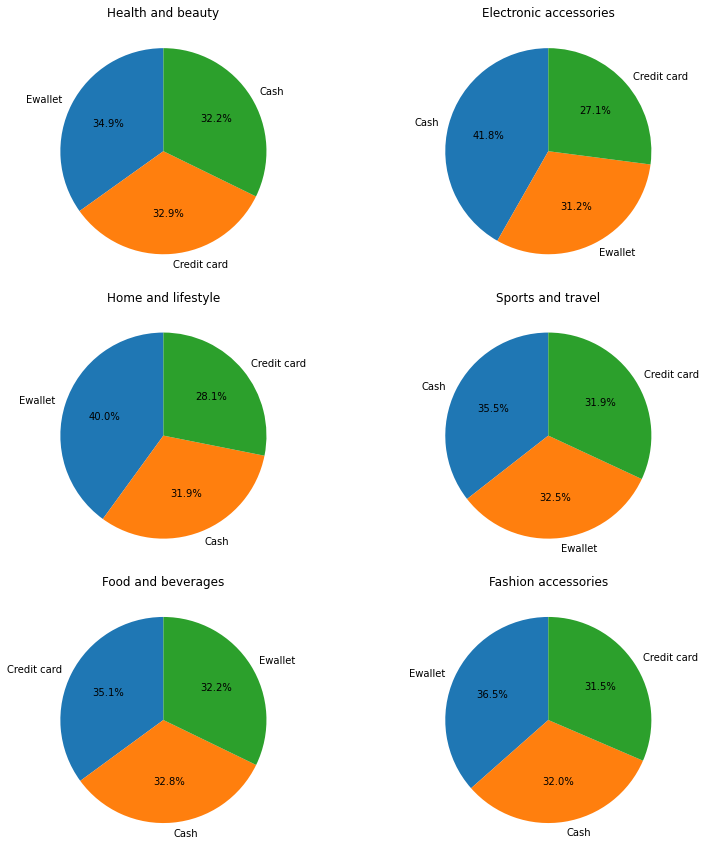

In [19]:
product_lines = df['Product line'].unique()

fig, axes = plt.subplots(3, 2, figsize=(12, 12))

axes = axes.ravel()

for i, product_line in enumerate(product_lines):
    ax = axes[i]

    product_data = df[df['Product line'] == product_line]

    payment_counts = product_data['Payment'].value_counts()

    ax.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(f'{product_line}')

plt.tight_layout()
plt.show()

##### Figure 8.2.
Same information visualized with pie charts.

In [20]:
prodtypessaled = df.groupby('Product line')['Quantity'].sum().reset_index()
prodtypessaled

,Product line,Quantity
0,Electronic accessories,971
1,Fashion accessories,902
2,Food and beverages,952
3,Health and beauty,854
4,Home and lifestyle,911
5,Sports and travel,920


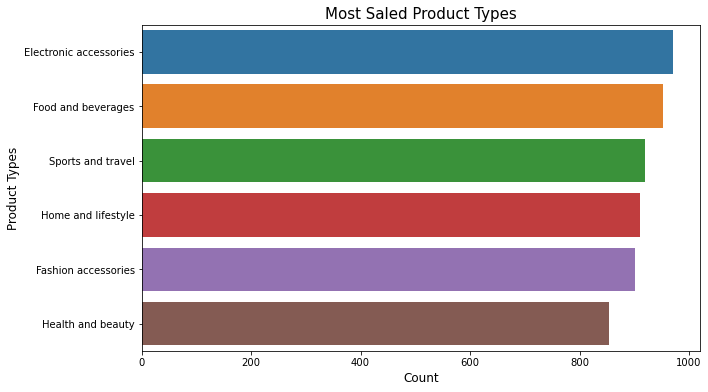

In [21]:
order = prodtypessaled.sort_values(by='Quantity', ascending=False)['Product line']

plt.figure(figsize=(10,6))

ax = sns.barplot( x='Quantity', y='Product line',data=prodtypessaled, order=order)

plt.title('Most Saled Product Types', fontsize= 15)
plt.ylabel('Product Types', fontsize=12)
plt.xlabel('Count', fontsize=12)
plt.show()

##### Figure 9.
Electronic accessories are the top-selling products within the product line, with the highest number of sales. In contrast, health and beauty products have the fewest transactions.

### Customers

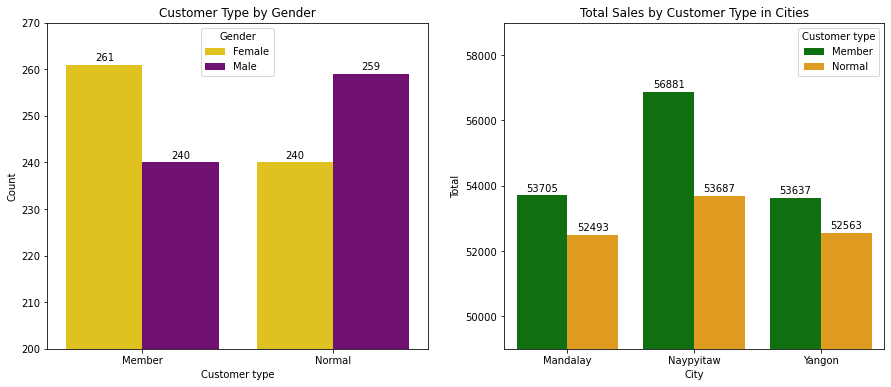

In [22]:
membergender = df.groupby(['Customer type','Gender'])['Gender'].count()
membergender = membergender.reset_index(name='Count')

fig, axes = plt.subplots(1,2, figsize=(15,6))

colors_1 = ['#FFD700','#800080']
one = sns.barplot(x='Customer type', y='Count', hue='Gender', data=membergender, ax=axes[0], palette = colors_1)

for g in one.patches:
    one.annotate(f'{g.get_height():.0f}',(g.get_x()+g.get_width()/2,g.get_height()), xytext=(0,7), ha='center',va='center',
                textcoords='offset points')

one.set_ylim(200,270)
one.set_title('Customer Type by Gender')

# --------------------------------------------------------
customer = df.groupby(['Customer type','City'])['Total'].sum().reset_index()

colors = ['#008000','#FFA500']

two = sns.barplot(x='City', y='Total', hue='Customer type', data=customer, ci=None, palette=colors)

two.set_ylim(49000,59000)

for c in two.patches:
    two.annotate(f'{c.get_height():.0f}',(c.get_x()+c.get_width()/2, c.get_height()), xytext=(0,7), ha='center',va='center',
                textcoords='offset points')
    
two.set_title('Total Sales by Customer Type in Cities')

plt.show()

##### Figures  10. and 11.
Interestingly, more women tend to be members, whereas men outnumber women as regular customers.
Moreover, members tend to spend more than normal buyers in every city.